In [ ]:
# SNOWIE Case Study IOP23 3/9/2017 20:00 - 23:45Z

In [ ]:
#Import Packages

In [2]:
import netCDF4 as nc
import numpy as np
import random
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import BoundaryNorm
import matplotlib.patches as mpatches
from matplotlib.markers import MarkerStyle
import matplotlib.patheffects as PathEffects
from matplotlib.image import imread
import matplotlib.dates as mdates
import matplotlib.mlab as mlab
import matplotlib.cm as cm
import matplotlib.contour
import pandas as pd
import datetime as dt
from datetime import datetime
import time 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.contour
import xarray as xr
import statistics
import csv
import metpy
from metpy.units import units, pandas_dataframe_to_unit_arrays
import metpy.calc as mpcalc
from metpy.plots import SkewT
from metpy.plots import ImagePlot, MapPanel, PanelContainer
from metpy.calc import wind_components
from metpy.interpolate import cross_section
from scipy.constants import convert_temperature

C:\Users\mstell2\Miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#**********************************************************************************************

In [4]:
# Load probe and aircraft netCDF Data Files

In [5]:
IOP23=nc.Dataset('nevzorov_corr_IOP23.nc','r')  #SNOWIE Nevzorov probe LWC/TWC/IWC Variables IOP22

In [6]:
IOP23_Orig=nc.Dataset('20170309b.c1.nc','r')  #SNOWIE Orig_Files Aircraft Data IOP12

In [7]:
#Load Sounding Data & Define Variables -Crouch Location

In [8]:
#Sounding 19Z

In [9]:
df_19Z = pd.read_csv('Crouch_1901_Sounding.csv')
P_19Z = np.asarray((df_19Z['Sound_hPa'])*units.hPa)
T_19Z = np.asarray((df_19Z['Sound_Temp']))
WindS_19Z = np.asarray((df_19Z['Sound_WindS'])*units.meter/units.second)
WindD_19Z = np.asarray((df_19Z['Sound_WindD'])*units.degrees)
temperatureC_19Z = T_19Z*units.degC
RH_19Z = np.asarray((df_19Z['Sound_RH'])*units.percent)
K_19Z = convert_temperature(T_19Z,'C','K')
temperature19Z = T_19Z*units.degC
temperatureK_19Z = K_19Z*units.kelvin
rh19Z = RH_19Z*units.percent
Td_19Z = mpcalc.dewpoint_from_relative_humidity(temperatureK_19Z, rh19Z)

pressureMb_19Z = P_19Z*units.mbar
pressure_hPa_19Z= P_19Z*units.hPa
Theta_19Z = mpcalc.potential_temperature(pressureMb_19Z, temperatureK_19Z)
Theta_E_19Z = mpcalc.equivalent_potential_temperature(pressureMb_19Z, temperatureK_19Z, Td_19Z)
wind_speed19Z = WindS_19Z*units.meter/units.second
wind_direction19Z = WindD_19Z*units.degrees
u_19Z,v_19Z = mpcalc.wind_components(wind_speed19Z, wind_direction19Z)
lcl_pressure19Z, lcl_temperature19Z = mpcalc.lcl(pressure_hPa_19Z[0], temperatureC_19Z[0], Td_19Z[0])
height19Z = mpcalc.pressure_to_height_std(pressure_hPa_19Z)
height19Z = height19Z.to(units.meter)
#print(Td_19Z)

In [10]:
#Lowman 22:01Z Sounding

In [11]:
df_22Z = pd.read_csv('Lowman_IOP23_2201_Sounding.csv')
P_22Z = np.asarray(df_22Z['Sound_hPa'])
T_22Z = np.asarray(df_22Z['Sound_Temp'])
WindS_22Z = np.asarray(df_22Z['Sound_WindS'])
WindD_22Z = np.asarray(df_22Z['Sound_WindD'])
RH_22Z = np.asarray(df_22Z['Sound_RH'])
temperatureC_22Z = T_22Z*units.degC
rh22Z = RH_22Z*units.percent
K_22Z = convert_temperature(T_22Z,'C','K')
temperatureK_22Z = K_22Z*units.kelvin
Td_22Z = mpcalc.dewpoint_from_relative_humidity(temperatureK_22Z, rh22Z)
pressureMb_22Z = P_22Z*units.mbar
pressure_hPa_22Z= P_22Z*units.hPa
Theta_22Z = mpcalc.potential_temperature(pressureMb_22Z, temperatureK_22Z)
Theta_E_22Z = mpcalc.equivalent_potential_temperature(pressureMb_22Z, temperatureK_22Z, Td_22Z)
wind_speed22Z = WindS_22Z*units.meter/units.second
wind_direction22Z = WindD_22Z*units.degrees
u_22Z,v_22Z = mpcalc.wind_components(wind_speed22Z, wind_direction22Z)
lcl_pressure22Z, lcl_temperature22Z = mpcalc.lcl(pressure_hPa_22Z[0], temperatureC_22Z[0], Td_22Z[0])
height22Z = mpcalc.pressure_to_height_std(pressure_hPa_22Z)
height22Z = height22Z.to(units.meter)


In [12]:
#Crouch 23:01 Sounding 

In [13]:
df_23Z = pd.read_csv('Crouch_IOP23_2301_Sounding.csv')
P_23Z = np.asarray(df_23Z['Sound_hPa'])
T_23Z = np.asarray(df_23Z['Sound_Temp'])
WindS_23Z = np.asarray(df_23Z['Sound_WindS'])
WindD_23Z = np.asarray(df_23Z['Sound_WindD'])
RH_23Z = np.asarray(df_23Z['Sound_RH'])
temperatureC_23Z = T_23Z*units.degC
rh23Z = RH_23Z*units.percent
K_23Z = convert_temperature(T_23Z,'C','K')
temperatureK_23Z = K_23Z*units.kelvin
Td_23Z = mpcalc.dewpoint_from_relative_humidity(temperatureK_23Z, rh23Z)
pressure_hPa_23Z= P_23Z*units.hPa
pressureMb_23Z = P_23Z*units.mbar
Theta_23Z = mpcalc.potential_temperature(pressureMb_23Z, temperatureK_23Z)
Theta_E_23Z = mpcalc.equivalent_potential_temperature(pressureMb_23Z, temperatureK_23Z, Td_23Z)
wind_speed23Z = WindS_23Z*units.meter/units.second
wind_direction23Z = WindD_23Z*units.degrees
u_23Z, v_23Z = mpcalc.wind_components(wind_speed23Z, wind_direction23Z)
#lcl_pressure22Z, lcl_temperature22Z = mpcalc.lcl(pressure_hPa_22Z[-1], temperatureC_22Z[0], Td_22Z[0])
height23Z = mpcalc.pressure_to_height_std(pressure_hPa_23Z)
height23Z = height23Z.to(units.meter)


In [14]:
# Define Variables

In [15]:
# SNOWIE IOP Time/LWC/IWC/TWC Variables

In [16]:
IOP23time = IOP23.variables['time_s'][:] #Dimension 14371, Units: hours since 1/1/1970
lwc = IOP23.variables['lwc_corr'][:] #units g/m^3
iwc = IOP23.variables['iwc_corr'][:] #units g/m^3|
twc = IOP23.variables['twc_corr'][:] #units g/m^3

In [17]:
#SNOWIE UWKA aircraft variables

In [18]:
UWKA_Time =IOP23_Orig.variables['time'][:] #time dimensions 14371  #seconds since 1/1/2017 00:00:00  IOP12 time interval 19:30:25 - 23:29:55 2/7/2017 (1486495825 - 1486510195)
td =IOP23_Orig.variables['tdp'][:]  #dew point temp degrees Celsius
mr =IOP23_Orig.variables['mr'][:]  #mixing ratio g/kg
rh =IOP23_Orig.variables['rh'][:]  #relative humidity %
PALT =IOP23_Orig.variables['PALT'][:]  #Pressure altitude meters
alt =IOP23_Orig.variables['ztrue'][:] #hypsometric altitude meters
tas =IOP23_Orig.variables['tas'][:]  #true airspeed m/s
GLAT =IOP23_Orig.variables['GLAT'][:]  # latitude degrees north 
GLON =IOP23_Orig.variables['GLON'][:]  #Longitude degrees east
GALT =IOP23_Orig.variables['GALT'][:]  #Altitude meters
topo =IOP23_Orig.variables['topo'][:]  #topography meters WGS84 aster
pTemp =IOP23_Orig.variables['thetad'][:] # potential temperature dry K
eTemp =IOP23_Orig.variables['thetae'][:]  #Equivalent potential temperature K 
twodp =IOP23_Orig.variables['twodp'][:] # 2DP shadow or concentration liter-1 sample rate 10 
uwind =IOP23_Orig.variables['avuwind'][:] #horizontal wind e/w component (x axis) m/s
vwind =IOP23_Orig.variables['avvwind'][:]  # horizontal wind n/s component (yaxis) m/s
zwind =IOP23_Orig.variables['avwwind'][:]  #vertical wind up component (z axis) m/s upward air verlocity 
winddir =IOP23_Orig.variables['avwdir'][:]  #real time wind direction (from) degree T 
windmag =IOP23_Orig.variables['avwmag'][:]  #real time wind magnitude m/s
CDP_Con =IOP23_Orig.variables['cdpconc_NRB'][:] #DMT CDP Total Concentration (/cc)
CDP_LWC =IOP23_Orig.variables['cdplwc_NRB'][:]  #DMT CDP Liquid Water Content (g/m^3)
CDP_Diam =IOP23_Orig.variables['cdpdbar_NRB'][:] #DMT CDP Mean Diameter (um)
UWKA_Temp =IOP23_Orig.variables['trose'][:] #Temperature degrees celsius

In [19]:
# Fix SNOWIE Instrument Time: SNOWIE Nevzorov Data is in seconds since Jan 1, 1970, aircraft is seconds since 1/1/17 

In [20]:
#days_since_1970 = 365*47+12
#time = time/24 - seconds_since_1970
#1/1/2017 00:00:00 = 1483228800 (seconds since 1/1/1970 to 1/1/17)
#1486425600 seconds since 1/1/1970 to 2/7/2017 00:00:00
#IOP12 time interval 19:30:25 - 23:29:55 2/7/2017 (1486495825 - 1486510195 seconds since 1970)

In [21]:
UWKA_Time_IOP23 = UWKA_Time + 1483228800 #seconds from 1/1/1970 - 1/1/2017
#print(UWKA_Time_IOP12)

In [22]:
UWKA_Time_Corr = mdates.epoch2num(UWKA_Time_IOP23)
#print(UWKA_Time_Corr)

C:\Users\mstell2\AppData\Local\Temp\ipykernel_19988\1419224986.py:1: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.5 and will be removed two minor releases later. Use `date2num(datetime.utcfromtimestamp(e))<.date2num>` instead.
  UWKA_Time_Corr = mdates.epoch2num(UWKA_Time_IOP23)


In [23]:
#Put instrument data in seconds since 1/1/2017 to match aircraft time

In [24]:
Micro_Time = mdates.epoch2num(IOP23time) #puts microphysics time into hours, minutes and seconds
#print(Micro_Time)

C:\Users\mstell2\AppData\Local\Temp\ipykernel_19988\1773702937.py:1: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.5 and will be removed two minor releases later. Use `date2num(datetime.utcfromtimestamp(e))<.date2num>` instead.
  Micro_Time = mdates.epoch2num(IOP23time) #puts microphysics time into hours, minutes and seconds


In [ ]:
# Plot SNOWIE Nevzorov Liquid Water Contenct (LWC), Ice Water Content (IWC), and Total Water Content (TWC)

In [ ]:
#Plot UWKA Aircraft variables

C:\Users\mstell2\AppData\Local\Temp\ipykernel_19988\446823996.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(Micro_Time, lwc, marker ='.', markersize = '1', linestyle = '-', color = 'navy')


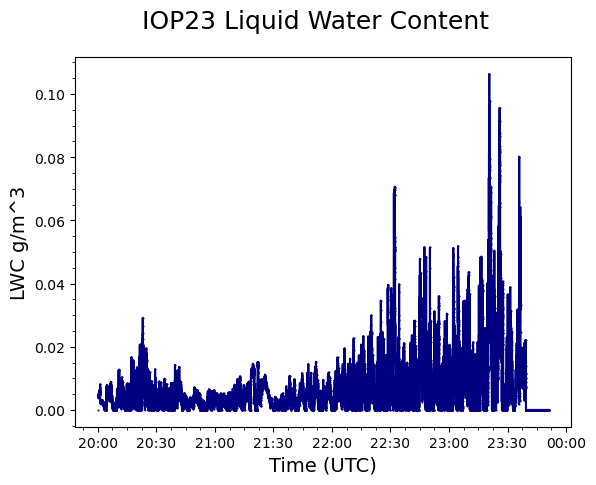

In [25]:
fig, ax = plt.subplots()
fig.suptitle('IOP23 Liquid Water Content', fontsize = 18)

# Plot the date using plot_date rather than plot
ax.plot_date(Micro_Time, lwc, marker ='.', markersize = '1', linestyle = '-', color = 'navy')

# Choose your xtick format string
date_fmt = '%H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_major_locator(MultipleLocator(0.7))
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.ylabel('LWC g/m^3', fontsize = 14)
plt.xlabel('Time (UTC)', fontsize = 14)

#plt.savefig('LWC_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show()


C:\Users\mstell2\AppData\Local\Temp\ipykernel_19988\1859805939.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(Micro_Time, iwc, marker ='.', markersize = '1', linestyle = '-', color = 'navy')


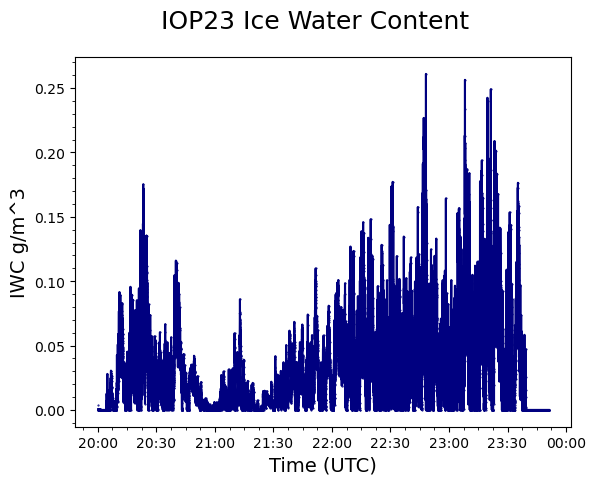

In [26]:
fig, ax = plt.subplots()
fig.suptitle('IOP23 Ice Water Content', fontsize = 18)

# Plot the date using plot_date rather than plot
ax.plot_date(Micro_Time, iwc, marker ='.', markersize = '1', linestyle = '-', color = 'navy')

# Choose your xtick format string
date_fmt = '%H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.ylabel('IWC g/m^3', fontsize = 14)
plt.xlabel('Time (UTC)', fontsize = 14)

#plt.savefig('IWC_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show()

#set threshold for 0.05
# Ice Water Content (TWC - LWC)

C:\Users\mstell2\AppData\Local\Temp\ipykernel_19988\4105739225.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(Micro_Time, twc, marker ='.', markersize = '1', linestyle = '-', color = 'navy')


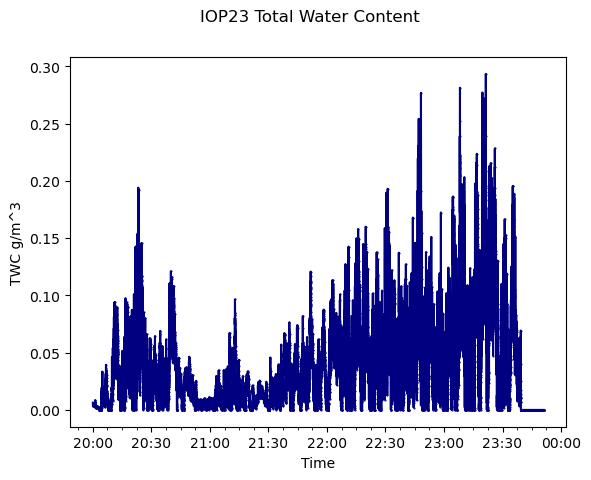

In [27]:
fig, ax = plt.subplots()
fig.suptitle('IOP23 Total Water Content' )
# Plot the date using plot_date rather than plot
ax.plot_date(Micro_Time, twc, marker ='.', markersize = '1', linestyle = '-', color = 'navy')

# Choose your xtick format string
date_fmt = '%H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator())

plt.ylabel('TWC g/m^3')
plt.xlabel('Time')

#plt.savefig('TWC_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

plt.show()
# Total Water Content

In [25]:
Micro_Time = mdates.epoch2num(IOP23time) #puts microphysics time into hours, minutes and seconds
#print(Micro_Time)
#20:21 1486498860
#20:22 1486498920

print((UWKA_Time_Corr)) #17204 is days .xxxxx is the hours minutes and seconds


[17234.82331019 17234.82332176 17234.82333333 ... 17234.99380787
 17234.99381944 17234.99383102]


C:\Users\mstell2\AppData\Local\Temp\ipykernel_10940\2495543344.py:1: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.5 and will be removed two minor releases later. Use mdates.date2num(datetime.utcfromtimestamp(e)) instead.
  Micro_Time = mdates.epoch2num(IOP23time) #puts microphysics time into hours, minutes and seconds


In [ ]:
UWKA_Time_CorrInd = np.where

In [75]:
Seconds = np.round(np.remainder(UWKA_Time_Corr,1)*24*3600)
StartTime = 22*3600 + 32*60 
StartTimeind = np.where(StartTime==Seconds)
print(StartTimeind[0])
#22:32 = 9986
#22:33 = 10046



[9986]


C:\Users\mstell2\AppData\Local\Temp\ipykernel_10940\1014269982.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(UWKA_Time_Corr[9986:10046], twodp[9986:10046], marker ='.', markersize = '1', linestyle = '-', color = 'teal')


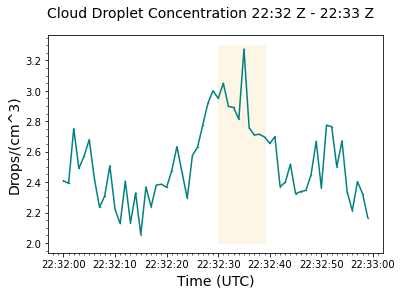

In [70]:
fig, ax = plt.subplots()
fig.suptitle('Cloud Droplet Concentration 22:32 Z - 22:33 Z', fontsize = 14)
# Plot the date using plot_date rather than plot
ax.plot_date(UWKA_Time_Corr[9986:10046], twodp[9986:10046], marker ='.', markersize = '1', linestyle = '-', color = 'teal')

# Choose your xtick format string
date_fmt = '%H:%M:%S'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator())

#ax.set_xlim(a,b)
plt.ylabel('Drops/(cm^3)', fontsize = 14)
plt.xlabel('Time (UTC)', fontsize = 14)

x = (UWKA_Time_Corr[10016:10026])
y1 = 2
y2= 3.3
ax.fill_between(x,y1,y2, color = 'oldlace')

plt.savefig('TwoDP IOP23.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

plt.show()
# TwoDP Concentration 

C:\Users\mstell2\AppData\Local\Temp\ipykernel_10940\970552129.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(UWKA_Time_Corr[9986:10046], iwc[9986:10046], marker ='.', markersize = '1', linestyle = '-', color = 'navy', label = 'IWC')
C:\Users\mstell2\AppData\Local\Temp\ipykernel_10940\970552129.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(UWKA_Time_Corr[9986:10046], lwc[9986:10046], marker ='.', markersize = '1', linestyle = '-', color = 'steelblue', label = 'LWC')


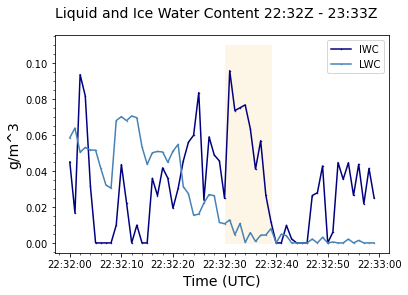

In [76]:
fig, ax = plt.subplots()
fig.suptitle('Liquid and Ice Water Content 22:32Z - 23:33Z', fontsize = 14)
# Plot the date using plot_date rather than plot
ax.plot_date(UWKA_Time_Corr[9986:10046], iwc[9986:10046], marker ='.', markersize = '1', linestyle = '-', color = 'navy', label = 'IWC')
ax.plot_date(UWKA_Time_Corr[9986:10046], lwc[9986:10046], marker ='.', markersize = '1', linestyle = '-', color = 'steelblue', label = 'LWC')

# Choose your xtick format string
date_fmt = '%H:%M:%S'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator())

#ax.set_xlim(a,b)
plt.ylabel('g/m^3', fontsize = 14)
plt.xlabel('Time (UTC)', fontsize = 14)

x = (UWKA_Time_Corr[10016:10026])
y1 = 0
y2= 0.11
ax.fill_between(x,y1,y2, color = 'oldlace')

plt.legend (loc='best', )
plt.savefig('IOP23 LWC_IWC.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

plt.show()


C:\Users\mstell2\AppData\Local\Temp\ipykernel_19988\2920459400.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(UWKA_Time_Corr, iwc, marker ='.', markersize = '1', linestyle = '-', color = 'navy', label = 'IWC')
C:\Users\mstell2\AppData\Local\Temp\ipykernel_19988\2920459400.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(UWKA_Time_Corr, lwc, marker ='.', markersize = '1', linestyle = '-', color = 'steelblue', label = 'LWC')


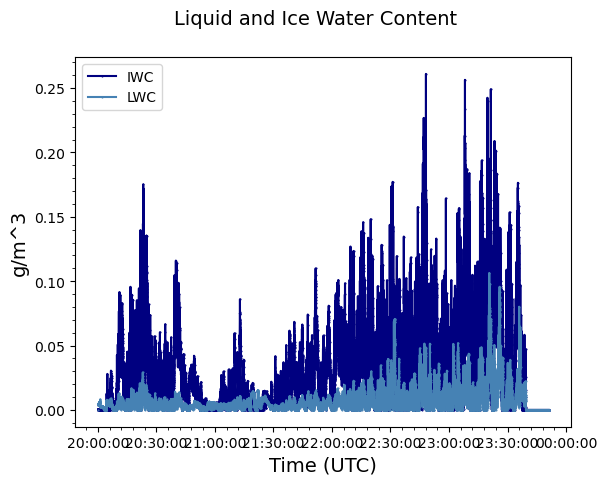

In [30]:
fig, ax = plt.subplots()
fig.suptitle('Liquid and Ice Water Content', fontsize = 14)
# Plot the date using plot_date rather than plot
ax.plot_date(UWKA_Time_Corr, iwc, marker ='.', markersize = '1', linestyle = '-', color = 'navy', label = 'IWC')
ax.plot_date(UWKA_Time_Corr, lwc, marker ='.', markersize = '1', linestyle = '-', color = 'steelblue', label = 'LWC')

# Choose your xtick format string
date_fmt = '%H:%M:%S'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator())

#ax.set_xlim(a,b)
plt.ylabel('g/m^3', fontsize = 14)
plt.xlabel('Time (UTC)', fontsize = 14)

x = (UWKA_Time_Corr[10016:10026])
y1 = 0
y2= 0.11
ax.fill_between(x,y1,y2, color = 'oldlace')

plt.legend (loc='best', )
plt.savefig('IOP23 LWC_IWC.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

plt.show()


C:\Users\mstell2\AppData\Local\Temp\ipykernel_10940\934755565.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(UWKA_Time_Corr[9986:10046], UWKA_Temp[9076:9136], marker ='.', markersize = '1', linestyle = '-', color = 'firebrick')


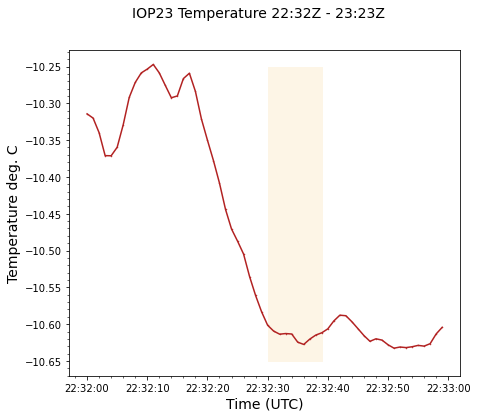

In [82]:
fig, ax = plt.subplots()
fig.suptitle('IOP23 Temperature 22:32Z - 23:23Z', fontsize = 14)
fig.set_size_inches(7,6)

# Plot the date using plot_date rather than plot
ax.plot_date(UWKA_Time_Corr[9986:10046], UWKA_Temp[9076:9136], marker ='.', markersize = '1', linestyle = '-', color = 'firebrick')
#ax.plot_date(UWKA_Time_Corr[2435:2495], lwc[2435:2495], marker ='.', markersize = '1', linestyle = '-', color = 'steelblue', label = 'LWC')

# Choose your xtick format string
date_fmt = '%H:%M:%S'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator())

#ax.set_xlim(a,b)
plt.ylabel('Temperature deg. C', fontsize = 14)
plt.xlabel('Time (UTC)', fontsize = 14)


x = (UWKA_Time_Corr[10016:10026])
y1 = -10.65
y2= -10.25
ax.fill_between(x,y1,y2, color = 'oldlace')

plt.savefig('IOP23 Temperature.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='horizontal')
plt.show()


C:\Users\mstell2\AppData\Local\Temp\ipykernel_19988\2702485780.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(UWKA_Time_Corr, UWKA_Temp, marker ='.', markersize = '1', linestyle = '-', color = 'firebrick')


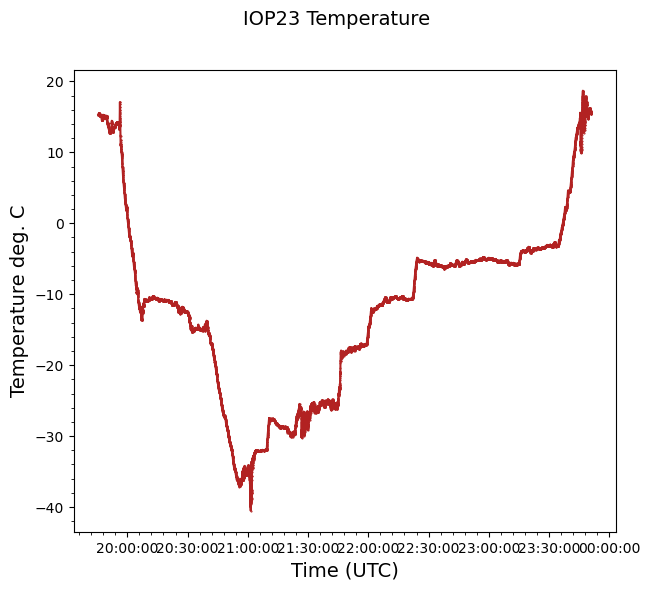

In [28]:
fig, ax = plt.subplots()
fig.suptitle('IOP23 Temperature', fontsize = 14)
fig.set_size_inches(7,6)

# Plot the date using plot_date rather than plot
ax.plot_date(UWKA_Time_Corr, UWKA_Temp, marker ='.', markersize = '1', linestyle = '-', color = 'firebrick')
#ax.plot_date(UWKA_Time_Corr[2435:2495], lwc[2435:2495], marker ='.', markersize = '1', linestyle = '-', color = 'steelblue', label = 'LWC')

# Choose your xtick format string
date_fmt = '%H:%M:%S'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator())

#ax.set_xlim(a,b)
plt.ylabel('Temperature deg. C', fontsize = 14)
plt.xlabel('Time (UTC)', fontsize = 14)


#plt.savefig('IOP23 Temperature.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='horizontal')
plt.show()


C:\Users\mstell2\AppData\Local\Temp\ipykernel_19988\3252609785.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(UWKA_Time_Corr, twodp, marker ='.', markersize = '1', linestyle = '-', color = 'teal')


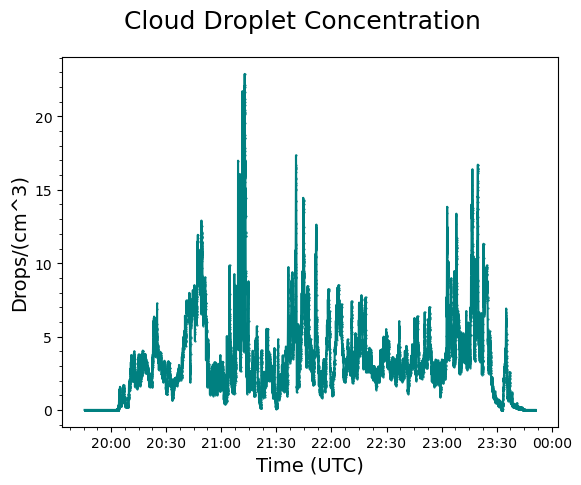

In [29]:
fig, ax = plt.subplots()
fig.suptitle('Cloud Droplet Concentration', fontsize = 18)
# Plot the date using plot_date rather than plot
ax.plot_date(UWKA_Time_Corr, twodp, marker ='.', markersize = '1', linestyle = '-', color = 'teal')

# Choose your xtick format string
date_fmt = '%H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.ylabel('Drops/(cm^3)', fontsize = 14)
plt.xlabel('Time (UTC)', fontsize = 14)

#plt.savefig('TwoDP_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

plt.show()
# TwoDP Concentration 